In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as plt
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')
X = df.drop('Class',axis=1)
Y = df['Class']

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,stratify=Y,random_state=42)

In [5]:
model = xgb.XGBClassifier(
    tree_method='hist',
    device='cuda',
    eval_metric='logloss',
    scale_pos_weight = (len(Y_train) - sum(Y_train))/sum(Y_train)
)

In [6]:
model.fit(X_train,Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [9]:
Y_pred = model.predict(X_test)

In [12]:
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))



Confusion Matrix:
[[56853    11]
 [   17    81]]


In [14]:
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, digits=4))



Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8804    0.8265    0.8526        98

    accuracy                         0.9995     56962
   macro avg     0.9401    0.9132    0.9262     56962
weighted avg     0.9995    0.9995    0.9995     56962



<Axes: xlabel='Class', ylabel='count'>

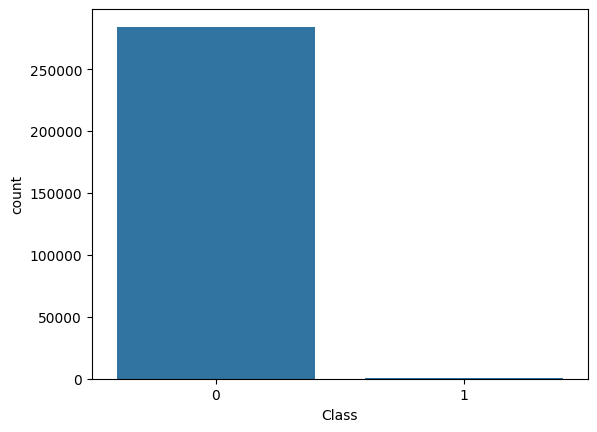

In [18]:
sns.countplot(x='Class', data=df)

In [72]:
data = np.array([[406, -0.814053959, 1.538221557, 1.115689964, -0.051666805, 0.092334157, 
                  -1.013397879, 0.748850874, -0.124813888, -0.20740695, 0.072841729, 
                  0.058284527, 0.639903035, 1.428942001, -0.830482497, 0.782317854, 
                  0.278964106, -0.083626315, -0.333308043, -0.158428708, 0.445198938, 
                  -0.311451579, -0.627543769, -0.016468582, 0.363402524, -0.014631082, 
                  0.076914148, 0.467478413, 0.22812287, 1.98]])

In [73]:
data = scaler.transform(data)
print(model.predict(data))
print(model.predict_proba(data))

[0]
[[9.9982840e-01 1.7158987e-04]]
